<a href="#"><img src="bissmillah.jpg" id="up"></a>

First, we import the libraries. 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warning is to ignoring any warning to keep the esthetic.
import warnings
warnings.simplefilter("ignore")

Then, input the dataset into dataframe 

In [3]:
df = pd.read_csv("./olympics2024.csv")

df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


Then, getting the general information from our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


Check if it has duplicated/doubled data. If it has, then clean it.

In [5]:
df.duplicated().sum()

np.int64(0)

Oh, it hasn't.

Then, describe the dataset as the statistic(ish) function.

In [42]:
df.describe(include='all') # 'all' is to keep showing the complete (including NaN) data below.

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
count,91.000000,91,91,91.000000,91.000000,91.000000,91.000000
unique,NaN,91,91,NaN,NaN,NaN,NaN
top,NaN,United States,US,NaN,NaN,NaN,NaN
freq,NaN,1,1,NaN,NaN,NaN,NaN
mean,45.307692,NaN,NaN,3.604396,3.593407,4.219780,11.417582
std,25.652244,NaN,NaN,6.990278,6.770816,6.558798,19.702829
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,23.500000,NaN,NaN,0.000000,0.000000,1.000000,2.000000
50%,44.000000,NaN,NaN,1.000000,1.000000,2.000000,5.000000
75%,68.000000,NaN,NaN,3.000000,3.000000,5.000000,9.000000


This function below is to determine the gold medal of each country with the crosstab delivery.

In [9]:
pd.crosstab(df['Country'], df['Gold'])

Gold,0,1,2,3,4,5,6,8,9,10,12,13,14,15,16,18,20,40
Country,,,,,,,,,,,,,,,,,,
Albania,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Armenia,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ukraine,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


 This function used to count the unique values in a DataFrame. 

In [39]:
df.groupby('Country').value_counts() # value_counts() is to showing the unique values in dataframe. return in a Series data type.

Country        Rank  Country Code  Gold  Silver  Bronze  Total
Albania        80    ALB           0     0       2       2        1
Algeria        39    ALG           2     0       1       3        1
Argentina      52    ARG           1     1       1       3        1
Armenia        66    ARM           0     3       1       4        1
Australia      4     AUS           18    19      16      53       1
                                                                 ..
Uganda         55    UGA           1     1       0       2        1
Ukraine        22    UKR           3     5       4       12       1
United States  1     US            40    44      42      126      1
Uzbekistan     13    UZB           8     2       3       13       1
Zambia         84    ZAM           0     0       1       1        1
Name: count, Length: 91, dtype: int64

<b>Now, me make the bar plot for the top 10 countries by total medals.</b>

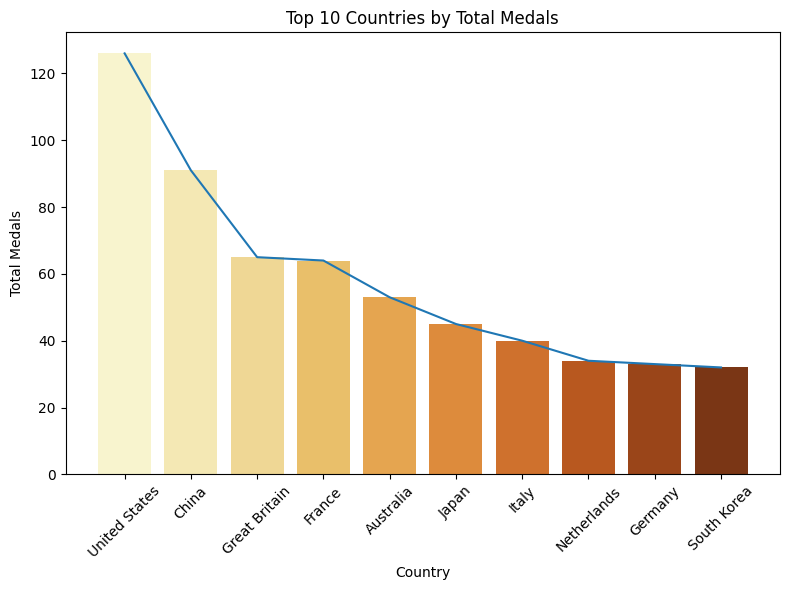

In [64]:
cols = ['Country', 'Total']
df_sorted = df.loc[:, cols].sort_values('Total', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df_sorted, x='Country', y='Total', palette='YlOrBr')
sns.lineplot(data=df_sorted, x='Country', y='Total')
ax.set_title('Top 10 Countries by Total Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Total Medals')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

<b>Then, we separate the ranking into certain medal (gold, silver, and bronze).</b>

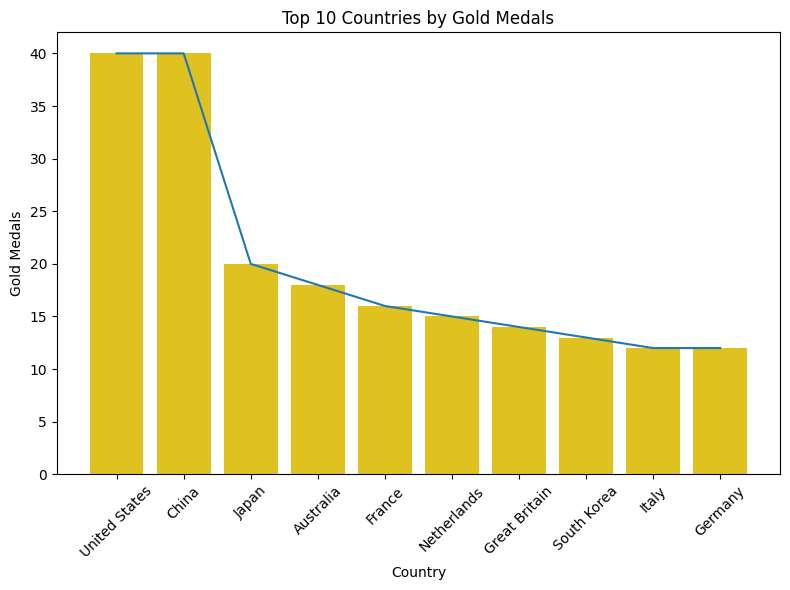

In [71]:
cols = ['Country', 'Gold']
df_sorted = df.loc[:, cols].sort_values('Gold', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df_sorted, x='Country', y='Gold', color='gold')
sns.lineplot(data=df_sorted, x='Country', y='Gold')
ax.set_title('Top 10 Countries by Gold Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Gold Medals')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

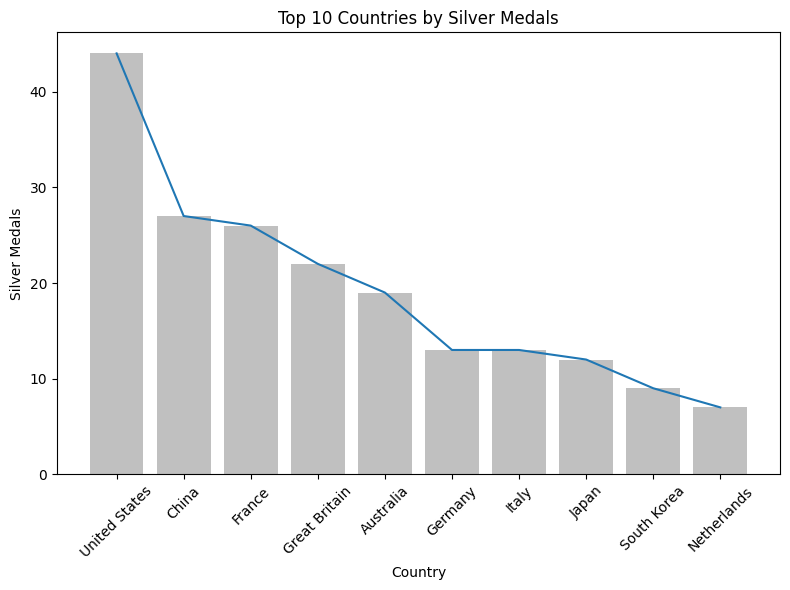

In [72]:
cols = ['Country', 'Silver']
df_sorted = df.loc[:, cols].sort_values('Silver', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Silver', data=df_sorted, ax=ax, color='silver')
sns.lineplot(data=df_sorted, x='Country', y='Silver')
ax.set_title('Top 10 Countries by Silver Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Silver Medals')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

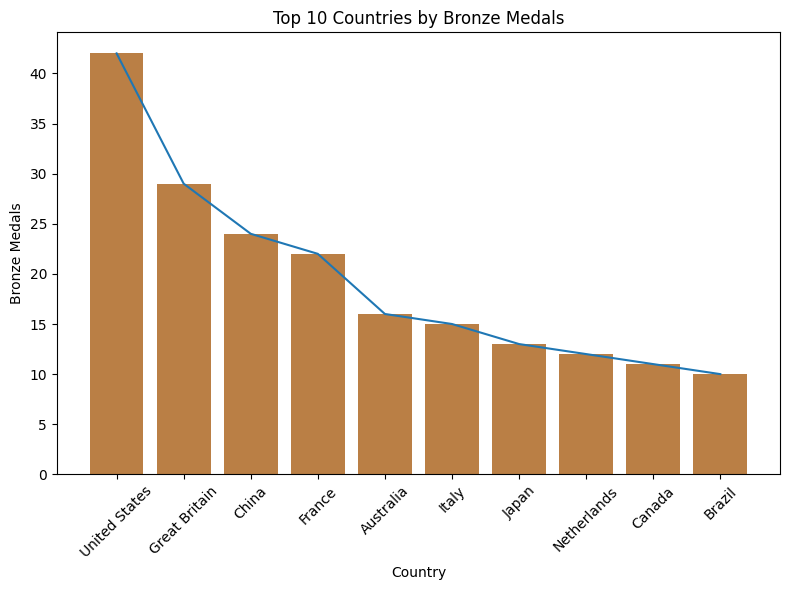

In [73]:
cols = ['Country', 'Bronze']
df_sorted = df.loc[:, cols].sort_values('Bronze', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Country', y='Bronze', data=df_sorted, ax=ax, color='#cd7f32')
sns.lineplot(data=df_sorted, x='Country', y='Bronze')
ax.set_title('Top 10 Countries by Bronze Medals')
ax.set_xlabel('Country')
ax.set_ylabel('Bronze Medals')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

<b>Now, we make pie bar for delivering distributed medal by it's type.</b>

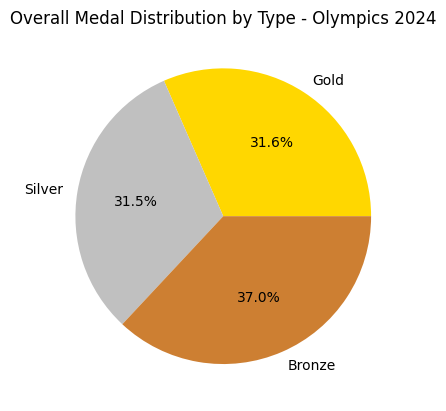

In [65]:
total_gold = df['Gold'].sum()
total_silver = df['Silver'].sum()
total_bronze = df['Bronze'].sum()
medal_counts = [total_gold, total_silver, total_bronze]
medal_labels = ['Gold', 'Silver', 'Bronze']
plt.pie(medal_counts, labels=medal_labels, autopct='%1.1f%%',
        colors=['gold','silver', '#cd7f32'])
plt.title('Overall Medal Distribution by Type - Olympics 2024')

plt.show()

<b>As we seen that the bronze is get more percentation in this olympic compare to gold and silver.</b>

<b>Now, we make the bar plot more detail into medal representation for each country.</b>

In [76]:
import plotly.express as px

df_melted = df.melt(id_vars=['Country'], 
                    value_vars=['Gold', 'Silver', 'Bronze'],
                    var_name='Medal Type', 
                    value_name='Count')

fig = px.bar(df_melted, x='Country', y='Count', color='Medal Type',
             color_discrete_map={'Gold':'gold',
                                 'Silver':'silver',
                                 'Bronze':'#cd7f32'},
             title='Medal Count by Type for Top Countries',
             labels={'Count':'Number of Medals',
                     'Country':'Country'},
             height=500)
fig.update_layout(xaxis_title='Country',yaxis_title='Number of Medals')
fig.show()


<b>Now, make it more real with geographical map representing the number of medal of each country.</b>

In [78]:
df['Country'] = df['Country'].str.strip()

fig = px.choropleth(df, locations='Country', 
                    locationmode='country names',
                    color='Total',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title='Total Medals by Country',
                    labels={'Total':'Number of Medals'})

fig.update_geos(showcoastlines=True, 
                coastlinecolor='black',
                showland=True,
                landcolor='lightgray')

fig.show()

<b>Now, importing a additional database about the medallist. 
Just additional, because that is conducting data that not existing before.</b>

In [26]:
medallists_df = pd.read_csv('./medallists.csv')

medallists_df

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2024-08-11,Bronze Medal,3,BOWEN Alex,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1993-09-04,1908350
2267,2024-08-11,Bronze Medal,3,DODD Chase William,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,2003-04-05,1908354
2268,2024-08-11,Bronze Medal,3,DODD Ryder,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,2006-01-19,1908355
2269,2024-08-11,Bronze Medal,3,IRVING Max,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1995-05-21,1908361


<b>Below is data about the journey of top 5 country.</b>

<Figure size 1400x800 with 0 Axes>

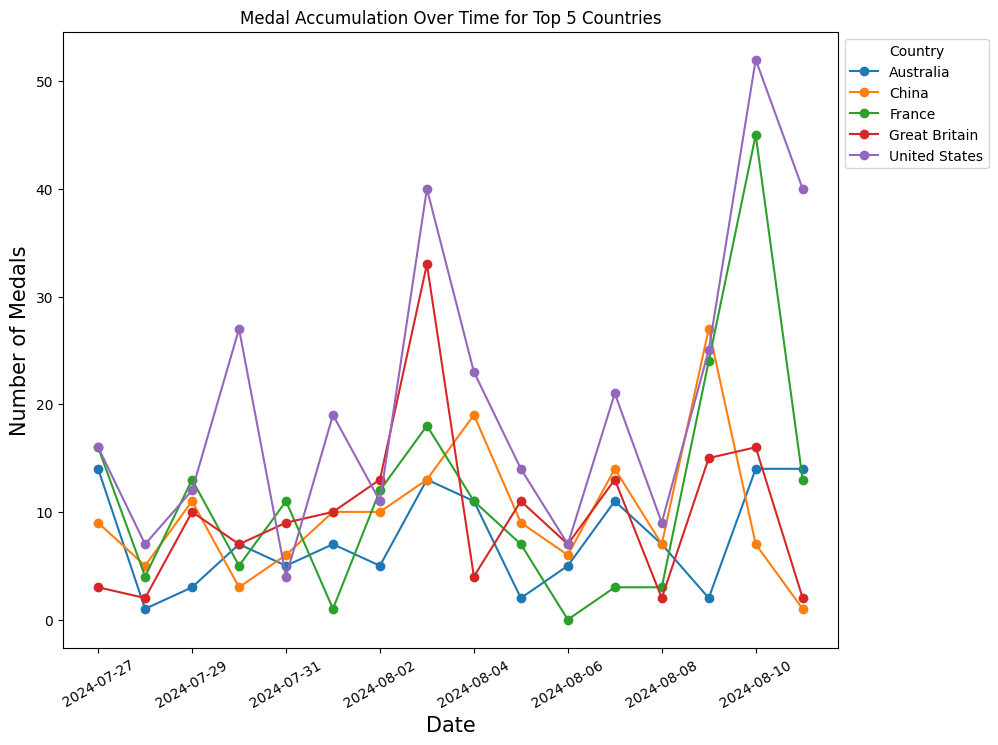

In [86]:
top_countries = medallists_df['country'].value_counts().head(5).index

filtered_data = medallists_df[medallists_df['country'].isin(top_countries)]

medals_by_date_country = filtered_data.groupby(['medal_date','country']).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
medals_by_date_country.plot(kind='line',
                            marker='o',
                            linestyle='-',
                            figsize=(10,8))
plt.title('Medal Accumulation Over Time for Top 5 Countries')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Medals', fontsize=15)
plt.xticks(rotation=30)
plt.legend(title='Country',
           bbox_to_anchor=(1,1),
           loc='upper left')

plt.show()

<b>And the last is about medal distribution accross country and discipline.</b>

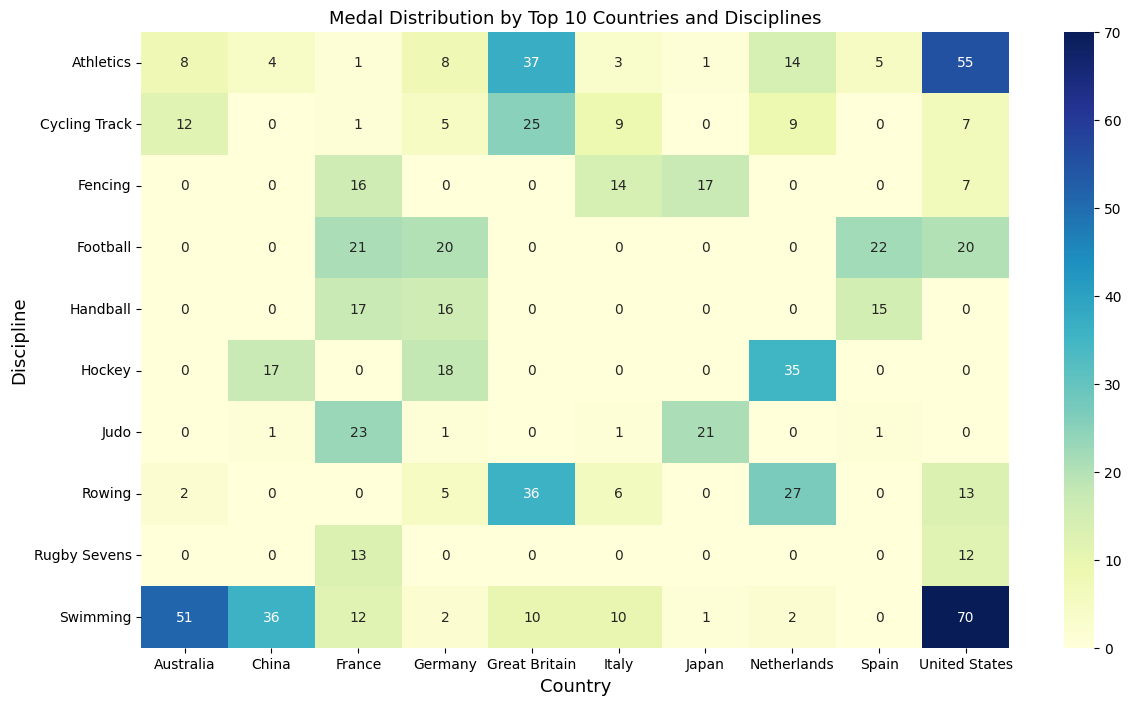

In [91]:
top_countries = medallists_df['country'].value_counts().head(10).index
top_disciplines = medallists_df['discipline'].value_counts().head(10).index
filtered_data = medallists_df[(medallists_df['country'].isin(top_countries)) &
                    (medallists_df['discipline'].isin(top_disciplines))]

heatmap_data = filtered_data.pivot_table(index='discipline',
                                         columns='country',
                                         values='medal_code',
                                         aggfunc='count',
                                         fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data,
            cmap='YlGnBu',
            annot=True,
            fmt='d')
plt.title('Medal Distribution by Top 10 Countries and Disciplines', fontsize=13)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Discipline', fontsize=13)

plt.show()